# 【第２回目　課題4】 Kerasを使った深層学習 (4): ImageNet 学習済モデルの利用．DCNN特徴抽出とファインチューニング．

Kerasでは，ImageNetの学習済モデルが簡単に利用できます．

### <a href="https://keras.io/ja/applications/">学習済モデル自動読み込みモジュール </a>
keras.datasets と同様に，自動ダウンロード機能を備えた <a href="https://keras.io/ja/applications/">keras.applicationsのモジュール群</a>が用意されています．(AlexNetはありません．)

* Xception (Kerasの作者の提案したネットワークです．モデルサイズと性能のバランスが優れている．)
* VGG16 / VGG19 （定番のVGG．パラメータが512MBもあって巨大なのが難点．)
* ResNet50
* InceptionV3 / InceptionResNetV2
* MobileNet (Googleのモバイル用ネットワーク．パラメータが17MBしかない．）
* NASNet (最新の自動構築されたネットワーク) <a href="https://arxiv.org/abs/1707.07012">(Neural Archtecture Search Network)</a>
    
初回実行時には，自動的にダウンロードが行われます．（ですので，Proxyが必要な環境では，事前に環境変数を設定する必要があります．)

各モデルの利用方法の詳細は，<a href="https://keras.io/ja/applications/#_2">画像分類モデルの使用例</a>を参照のこと．

In [1]:
import os
# AIX環境での proxy の設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import keras
from keras.preprocessing import image

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.
using GPU: 1


17227776/17225924 [==============================] - 8s 0us/step
[1]Predicted: [('n07579787', 'plate', 0.53661597), ('n07875152', 'potpie', 0.11678343), ('n07880968', 'burrito', 0.074962534), ('n07614500', 'ice_cream', 0.07327591), ('n07871810', 'meat_loaf', 0.050808948)]
[2]Predicted: [('n02113624', 'toy_poodle', 0.9146122), ('n02113712', 'miniature_poodle', 0.03763746), ('n02113799', 'standard_poodle', 0.029503802), ('n02086079', 'Pekinese', 0.005203387), ('n02086646', 'Blenheim_spaniel', 0.0022411505)]
[3]Predicted: [('n03127925', 'crate', 0.97503835), ('n03014705', 'chest', 0.017951958), ('n02747177', 'ashcan', 0.0025849917), ('n02971356', 'carton', 0.00096171536), ('n03337140', 'file', 0.00058019126)]


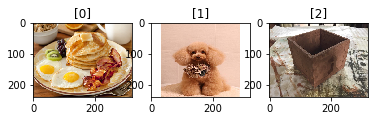

In [2]:
# MobileNet による 1000種類分類
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input, decode_predictions
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

model =  MobileNet(weights='imagenet', include_top=True) 
# include_top=False とすると全結合手前までの読み込みになる．特徴抽出に利用する．
for i in range(3):
    img_path = str(i+1) + '.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds= model.predict(x)
    # top-5 まで表示．
    print('['+str(i+1)+']'+'Predicted:', decode_predictions(preds, top=5)[0])
    
    img_org = Image.open(str(i+1)+'.jpg').resize((320,240))
    img = np.array(img_org, dtype=np.uint8)
    plt.subplot(131+i)
    plt.title('['+str(i)+']')
    plt.imshow(img)

In [3]:
"""
# ResNet50 の表示
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))
"""

"\n# ResNet50 の表示\nfrom IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\nSVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))\n"


### 課題4

以下の小問の(1)-(2)を解答すること．(3)は任意（できるだけやってみる方が望ましい．）．

1. ResNet50, Xception, MobileNetで，3枚以上の画像について，それぞれ1000種類認識を行うこと．
1. 上記のデータセットで，VGG16をfine-tuningして，画像分類を行うこと．
1. (2)と同様に, MobileNet, Xception, ResNet50など，別のネットワークで fine-tuningして，学習時間と精度を比較せよ．

(2), (3)は以下のデータセットのどれかを利用すること．UEC-Food20 のみ20種類で，あとは10種類です．すべて1クラス100枚ずつ入っています．  
（自分で用意可能な人は，自分で用意したものを利用してもよい．各カテゴリ100枚10クラス以上用意せよ．）

 * UEC-Food20 http://mm.cs.uec.ac.jp/uecfood20.zip
 * UEC-Food10 http://mm.cs.uec.ac.jp/uecfood10.zip (上記の10種類版．メモリが足りない場合にどうぞ．)
 * FlickrMaterialDatabase(FMD) http://mm.cs.uec.ac.jp/material10.zip
